# Lab 2: Probabilistic Reasoning

## Explanation/Summarization

This lab focuses on **Bayes' theorem** and its applications in probabilistic reasoning and learning algorithms. Key concepts covered include:

*   **Conditional probability:** The probability of an event occurring given that another event has already occurred.
*   **Bayes' theorem:** A formula that allows us to update the probability of a hypothesis based on new evidence.
*   **Chain rule:** A way to calculate the joint probability of multiple events.
*   **Prior probability:** The initial probability of an event before considering new evidence.
*   **Posterior probability:** The updated probability of an event after considering new evidence.
*   **Likelihood:** The probability of observing the evidence given a specific hypothesis.
*   **Law of total probability:** A way to calculate the probability of an event by considering all possible ways it can occur.

The lab demonstrates how these concepts can be applied to practical problems such as:

*   Evaluating learning algorithms.
*   Spam filtering.
*   Medical diagnosis.

## Exercise 1: Rare Disease Test

### Description

A rare disease affects 1 in 10,000 people. A test for the disease is 99% accurate, meaning:

*   If a person has the disease, the test will be positive 99% of the time.
*   If a person does not have the disease, the test will be negative 99% of the time.

Given that a randomly chosen person tests positive, what is the probability that they actually have the disease?

### Code

In [127]:
def rare_disease_test():
    p_disease = 1 / 10000
    p_positive_given_disease = 0.99
    p_positive_given_no_disease = 0.01

    # P(Positive)
    p_positive = (p_positive_given_disease * p_disease) + \
                 (p_positive_given_no_disease * (1 - p_disease))

    # P(Disease|Positive)
    p_disease_given_positive = (p_positive_given_disease * p_disease) / p_positive
    return round(p_disease_given_positive * 100, 2)  # Return percentage


## Exercise 2: Implement a Naive Bayes Spam Filter

### Description

You are tasked with building an email spam filter using a simplified version of the Naive Bayes' Theorem. You will be given a dataset of emails labeled as "spam" or "not spam". For each email, a set of common keywords is provided, along with their occurrences. The goal is to classify a new email as spam or not spam based on the words it contains.

### Code

In [128]:
from collections import defaultdict, Counter

class NaiveBayesSpamFilter:
    def __init__(self):
        self.spam_word_counts = defaultdict(int)
        self.ham_word_counts = defaultdict(int)
        self.spam_emails = 0
        self.ham_emails = 0
        self.vocabulary = set()

    def train(self, emails, labels):
        for email, label in zip(emails, labels):
            words = email.lower().split()

            if label == 'spam':
                self.spam_emails += 1
                for word in words:
                    self.spam_word_counts[word] += 1
            else:
                self.ham_emails += 1
                for word in words:
                    self.ham_word_counts[word] += 1

            self.vocabulary.update(words)

    def calculate_word_probability(self, word, is_spam):
        """Calculate P(word|spam) or P(word|ham) with Laplace smoothing"""
        if is_spam:
            return (self.spam_word_counts[word] + 1) / (self.spam_emails + 2)
        return (self.ham_word_counts[word] + 1) / (self.ham_emails + 2)

    def classify(self, email):
        """
        Classify a new email as spam or not spam

        Args:
            email (str): The email text to classify

        Returns:
            tuple: (classification, spam_probability)
        """
        words = email.lower().split()

        # Calculate P(spam) and P(ham)
        total_emails = self.spam_emails + self.ham_emails
        p_spam = self.spam_emails / total_emails
        p_ham = self.ham_emails / total_emails

        # Calculate P(words|spam) and P(words|ham)
        spam_probability = p_spam
        ham_probability = p_ham

        for word in words:
            if word in self.vocabulary:
                spam_probability *= self.calculate_word_probability(word, True)
                ham_probability *= self.calculate_word_probability(word, False)

        # Normalize probabilities
        total_probability = spam_probability + ham_probability
        spam_probability = spam_probability / total_probability

        return ('spam' if spam_probability > 0.5 else 'not spam', spam_probability)

# Example usage
def main():
    # Training data
    training_emails = [
        "win free offer money",
        "meeting schedule tomorrow project",
        "free money win big"
    ]
    training_labels = ['spam', 'not spam', 'spam']

    # Create and train the spam filter
    spam_filter = NaiveBayesSpamFilter()
    spam_filter.train(training_emails, training_labels)

    # Test new email
    new_email = "win free money"
    classification, probability = spam_filter.classify(new_email)

    print(f"Email: '{new_email}'")
    print(f"Classification: {classification}")
    print(f"Spam probability: {probability:.2%}")

if __name__ == "__main__":
    main()


Email: 'win free money'
Classification: spam
Spam probability: 95.80%


Okay, here's the breakdown for Lab 3, structured for a Jupyter Notebook:

# Lab 3: Random Variables

## Explanation/Summarization

This lab introduces the concept of **random variables** as a way to map outcomes from a sample space to numerical values. It covers:

*   **Discrete Random Variables:** Variables that take on a countable number of values.
    *   **Probability Mass Function (PMF):**  Describes the probability distribution of a discrete random variable.
    *   **Expectation (Mean):** The average value of a random variable.
    *   **Variance:** A measure of how spread out the values of a random variable are.
    *   **Standard Deviation:** The square root of the variance.
*   **Continuous Random Variables:** Variables that can take on any value within a given range.
    *   **Cumulative Distribution Function (CDF):** Describes the probability that a continuous random variable is less than or equal to a certain value.
    *   **Probability Density Function (PDF):**  The derivative of the CDF, used to describe the probability distribution of a continuous random variable.
*   **Basic Properties of Random Variables:**
    *   Linearity of Expectation: E[aX + b] = aE[X] + b
    *   E[g(X)] (for non-linear g)
    *   E[X + Y] = E[X] + E[Y]
    *   Var(X) = E[X^2] - (E[X])^2
    *   Var(aX) = a^2 Var(X)
    *   Cov(X, Y) = E[XY] - E[X]E[Y]

## Exercise: Covariance Calculation

### Description

You are a data analyst for an educational institution. You need to analyze the relationship between:

1. Student's study hours and their exam scores.
2. Student's class attendance and their exam scores.

You have data on 20 students, including their study hours, class attendance, and exam scores.

Your task is to:

*   Calculate the covariance between study hours and exam scores.
*   Calculate the covariance between class attendance and exam scores.

### Code


In [129]:
import pandas as pd
import numpy as np

# Dataset
data = {
    'Student': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    'Study Hours (X)': [5, 3, 6, 4, 8, 5, 7, 6, 4, 8, 9, 5, 7, 6, 5, 6, 7, 8, 5, 7],
    'Class Attendance (Y)': [80, 70, 90, 60, 100, 80, 90, 80, 70, 60, 80, 80, 90, 80, 70, 80, 90, 100, 80, 85],
    'Exam Score (Z)': [75, 65, 85, 70, 95, 75, 85, 75, 65, 70, 80, 75, 85, 75, 65, 75, 85, 95, 75, 80]
}

# Dataframe
df = pd.DataFrame(data)

# Covariance Matrix between Study Hours and Exam Score
cov_matrix_XZ = np.cov(df['Study Hours (X)'], df['Exam Score (Z)'])

# Extract Covariance
cov_XZ = cov_matrix_XZ[0][1]

# Covariance Matrix between Class Attendance and Exam Score
cov_matrix_YZ = np.cov(df['Class Attendance (Y)'], df['Exam Score (Z)'])

# Extract Covariance
cov_YZ = cov_matrix_YZ[0][1]

# Print
print("Covariance Matrix between Study Hours and Exam Score", "\n", cov_matrix_XZ, "\n")
print("Covariance between Study Hours and Exam Score", "\n", cov_XZ, "\n")
print("Covariance Matrix between Class Attendance and Exam Score", "\n", cov_matrix_YZ, "\n")
print("Covariance between Class Attendance and Exam Score", "\n", cov_YZ, "\n")

Covariance Matrix between Study Hours and Exam Score 
 [[ 2.47105263  9.86842105]
 [ 9.86842105 77.63157895]] 

Covariance between Study Hours and Exam Score 
 9.868421052631579 

Covariance Matrix between Class Attendance and Exam Score 
 [[121.77631579  88.81578947]
 [ 88.81578947  77.63157895]] 

Covariance between Class Attendance and Exam Score 
 88.8157894736842 



# Lab 4: Bayes-Ball Algorithm

## Explanation/Summarization

This lab introduces the **Bayes-Ball Algorithm**, a method for determining conditional independence relationships between nodes in a Bayesian Network. Key concepts include:

*   **d-separation:** A criterion to check if two nodes are conditionally independent given evidence.
*   **Active Path:** A path between two variables is active if they are dependent given the observed evidence.
*   **Inactive Path:** A path is inactive if the variables are conditionally independent given the evidence.

The algorithm uses the analogy of a ball traversing the network to represent the flow of information. The ball's movement is governed by rules based on arrow directions and whether nodes are observed (evidence).

**Rules:**

*   **Parent-to-Child (→ B → C):** If B is not observed, the ball can move from B to C and vice-versa.
*   **Child-to-Parent (A ← B ← C):** If B is not observed, the ball can move from B to A and vice-versa.
*   **Converging Node (Collider) (A → B ← C):**
    *   If B or a descendant of B is observed, the path is active, and the ball can pass through.
    *   If B is not observed, the path is inactive, and the ball is blocked.

## Exercise 1: A and D Independence

### Description

Consider the following Bayesian network:

*   A is a parent of B and C.
*   B is a parent of D.
*   C is a parent of D.

Determine whether variables A and D are independent, given no evidence.

### Code

In [130]:
from collections import deque

#    A
#   / \
#  C   B
#   \ /
#    D

class Node:
    def __init__(self, name):
        self.name = name
        self.parents = []
        self.children = []
        self.visited = False

def create_bayesian_network():
    # Create nodes
    nodes = {
        "A": Node("A"),
        "B": Node("B"),
        "C": Node("C"),
        "D": Node("D")
    }

    # Establish relationships (A -> B, A -> C, B -> D, C -> D)
    nodes["A"].children.extend([nodes["B"], nodes["C"]])
    nodes["B"].parents.append(nodes["A"])
    nodes["C"].parents.append(nodes["A"])

    nodes["B"].children.append(nodes["D"])
    nodes["C"].children.append(nodes["D"])
    nodes["D"].parents.extend([nodes["B"], nodes["C"]])

    return nodes

def bayes_ball(start, target, nodes):
    queue = deque([(start, "down")])  # Start ball from the start node in the down direction
    visited = set()

    while queue:
        current, direction = queue.popleft()

        if (current.name, direction) in visited:
            continue
        visited.add((current.name, direction))

        # If we reach the target node, return False (they are dependent)
        if current == target:
            return False

        # Propagate the ball
        if direction == "down":
            # Move to children (if current node is not observed)
            for child in current.children:
                queue.append((child, "down"))
            # Move to parents
            for parent in current.parents:
                queue.append((parent, "up"))

        elif direction == "up":
            # Move to parents (if current node is not observed)
            for parent in current.parents:
                queue.append((parent, "up"))
            # Move to children
            for child in current.children:
                queue.append((child, "down"))

    # If we can't reach the target node, return True (they are independent)
    return True

def main():
    # Create the Bayesian network
    nodes = create_bayesian_network()

    # Check if A and D are independent using Bayes-Ball algorithm
    independent = bayes_ball(nodes["A"], nodes["D"], nodes)

    # Output the result
    if independent:
        print("A and D are independent.")
    else:
        print("A and D are dependent.")

if __name__ == "__main__":
    main()

A and D are dependent.


## Exercise 2: Cold and Allergy Independence

### Description

A doctor is diagnosing a patient. The following Bayesian network represents the relationships:

*   Cold can cause Sneezing and Fever.
*   Allergy can cause Sneezing but not Fever.
*   Fever and Sneezing are observed symptoms.

Determine whether Cold and Allergy are conditionally independent, given that the patient has Sneezing but no other evidence (like Fever).

**Structure:** Cold → Fever, Cold → Sneezing, Allergy → Sneezing.

### Code

In [131]:
from collections import deque

class Node:
    def __init__(self, name):
        self.name = name
        self.parents = []
        self.children = []
        self.observed = False

def create_bayesian_network():
    # Create nodes
    nodes = {
        "Cold": Node("Cold"),
        "Allergy": Node("Allergy"),
        "Sneezing": Node("Sneezing"),
        "Fever": Node("Fever")
    }

    # Establish relationships (Cold -> Fever, Cold -> Sneezing, Allergy -> Sneezing)
    nodes["Cold"].children.extend([nodes["Fever"], nodes["Sneezing"]])
    nodes["Fever"].parents.append(nodes["Cold"])
    nodes["Sneezing"].parents.append(nodes["Cold"])

    nodes["Allergy"].children.append(nodes["Sneezing"])
    nodes["Sneezing"].parents.append(nodes["Allergy"])

    return nodes

def bayes_ball(start, target, nodes, observed_nodes):
    queue = deque([(start, "down")])  # Start ball from the start node in the down direction
    visited = set()

    # Mark observed nodes
    for obs in observed_nodes:
        nodes[obs].observed = True

    while queue:
        current, direction = queue.popleft()

        if (current.name, direction) in visited:
            continue
        visited.add((current.name, direction))

        # If we reach the target node, return False (they are dependent)
        if current == target:
            return False

        # Propagate the ball
        if direction == "down":
            # Move to children (if current node is not observed)
            if not current.observed:
                for child in current.children:
                    queue.append((child, "down"))
            # Move to parents
            for parent in current.parents:
                queue.append((parent, "up"))

        elif direction == "up":
            # If current is a collider and observed, continue propagating
            if current.observed:
                for child in current.children:
                    queue.append((child, "down"))
            # Move to parents
            if not current.observed:
                for parent in current.parents:
                    queue.append((parent, "up"))

    # If we can't reach the target node, return True (they are independent)
    return True

def main():
    # Create the Bayesian network
    nodes = create_bayesian_network()

    # Set "Sneezing" as observed
    observed_nodes = ["Sneezing"]

    # Check if Cold and Allergy are independent using Bayes-Ball algorithm
    independent = bayes_ball(nodes["Cold"], nodes["Allergy"], nodes, observed_nodes)

    # Output the result
    if independent:
        print("Cold and Allergy are independent given Sneezing.")
    else:
        print("Cold and Allergy are dependent given Sneezing.")

if __name__ == "__main__":
    main()

Cold and Allergy are dependent given Sneezing.


## Exercise 3: Server and Database Failure Independence

### Description

In a distributed system, we have:

*   Server failure can cause Application failure.
*   Database failure can cause Application failure.
*   Network Switch failure can cause both Server and Database failure.

Determine whether Server failure and Database failure are conditionally independent given that the Application has failed.

### Code

In [132]:
from collections import deque

class Node:
    def __init__(self, name):
        self.name = name
        self.parents = []
        self.children = []
        self.observed = False

def create_bayesian_network():
    # Create nodes
    nodes = {
        "Network Switch Failure": Node("Network Switch Failure"),
        "Server Failure": Node("Server Failure"),
        "Database Failure": Node("Database Failure"),
        "Application Failure": Node("Application Failure")
    }

    # Establish relationships
    nodes["Network Switch Failure"].children.extend([nodes["Server Failure"], nodes["Database Failure"]])
    nodes["Server Failure"].parents.append(nodes["Network Switch Failure"])
    nodes["Database Failure"].parents.append(nodes["Network Switch Failure"])

    nodes["Server Failure"].children.append(nodes["Application Failure"])
    nodes["Database Failure"].children.append(nodes["Application Failure"])
    nodes["Application Failure"].parents.extend([nodes["Server Failure"], nodes["Database Failure"]])

    return nodes

def bayes_ball(start, target, nodes, observed_nodes):
    queue = deque([(start, "down")])  # Start ball from the start node in the down direction
    visited = set()

    # Mark observed nodes
    for obs in observed_nodes:
        nodes[obs].observed = True

    while queue:
        current, direction = queue.popleft()

        if (current.name, direction) in visited:
            continue
        visited.add((current.name, direction))

        # If we reach the target node, return False (they are dependent)
        if current == target:
            return False

        # Propagate the ball
        if direction == "down":
            # Move to children (if current node is not observed)
            if not current.observed:
                for child in current.children:
                    queue.append((child, "down"))
            # Move to parents
            for parent in current.parents:
                queue.append((parent, "up"))

        elif direction == "up":
            # If current is a collider and observed, continue propagating
            if current.observed:
                for child in current.children:
                    queue.append((child, "down"))
            # Move to parents
            if not current.observed:
                for parent in current.parents:
                    queue.append((parent, "up"))

    # If we can't reach the target node, return True (they are independent)
    return True

def main():
    # Create the Bayesian network
    nodes = create_bayesian_network()

    # Set "Application Failure" as observed
    observed_nodes = ["Application Failure"]

    # Check if Server Failure and Database Failure are independent using Bayes-Ball algorithm
    independent = bayes_ball(nodes["Server Failure"], nodes["Database Failure"], nodes, observed_nodes)

    # Output the result
    if independent:
        print("Server Failure and Database Failure are independent given Application Failure.")
    else:
        print("Server Failure and Database Failure are dependent given Application Failure.")

if __name__ == "__main__":
    main()

Server Failure and Database Failure are dependent given Application Failure.


## Exercise 4: Battery and Fuel System Failure Independence

### Description

Diagnosing a car that won't start:

*   Battery Failure can cause Starter Motor Failure and Ignition System Failure.
*   Fuel System Failure can cause Engine Failure.
*   Ignition System Failure can cause Engine Failure.
*   Starter Motor Failure can cause Engine Failure.
*   Engine Failure causes the car to Not Start.

Determine whether Battery Failure and Fuel System Failure are conditionally independent given that the Engine has failed.

### Code

In [133]:
from collections import deque

class Node:
    def __init__(self, name):
        self.name = name
        self.parents = []
        self.children = []
        self.observed = False

def create_bayesian_network():
    # Create nodes
    nodes = {
        "Battery Failure": Node("Battery Failure"),
        "Starter Motor Failure": Node("Starter Motor Failure"),
        "Ignition System Failure": Node("Ignition System Failure"),
        "Fuel System Failure": Node("Fuel System Failure"),
        "Engine Failure": Node("Engine Failure"),
        "Not Start": Node("Not Start")
    }

    # Establish relationships
    nodes["Battery Failure"].children.extend([nodes["Starter Motor Failure"], nodes["Ignition System Failure"]])
    nodes["Starter Motor Failure"].parents.append(nodes["Battery Failure"])
    nodes["Ignition System Failure"].parents.append(nodes["Battery Failure"])

    nodes["Starter Motor Failure"].children.append(nodes["Engine Failure"])
    nodes["Ignition System Failure"].children.append(nodes["Engine Failure"])
    nodes["Fuel System Failure"].children.append(nodes["Engine Failure"])
    nodes["Engine Failure"].parents.extend(
        [nodes["Starter Motor Failure"], nodes["Ignition System Failure"], nodes["Fuel System Failure"]])

    nodes["Engine Failure"].children.append(nodes["Not Start"])
    nodes["Not Start"].parents.append(nodes["Engine Failure"])

    return nodes

def bayes_ball(start, target, nodes, observed_nodes):
    queue = deque([(start, "down")])  # Start ball from the start node in the down direction
    visited = set()

    # Mark observed nodes
    for obs in observed_nodes:
        nodes[obs].observed = True

    while queue:
        current, direction = queue.popleft()

        if (current.name, direction) in visited:
            continue
        visited.add((current.name, direction))

        # If we reach the target node, return False (they are dependent)
        if current == target:
            return False

        # Propagate the ball
        if direction == "down":
            # Move to children (if current node is not observed)
            if not current.observed:
                for child in current.children:
                    queue.append((child, "down"))
            # Move to parents
            for parent in current.parents:
                queue.append((parent, "up"))

        elif direction == "up":
            # If current is a collider and observed, continue propagating
            if current.observed:
                for child in current.children:
                    queue.append((child, "down"))
            # Move to parents
            if not current.observed:
                for parent in current.parents:
                    queue.append((parent, "up"))

    # If we can't reach the target node, return True (they are independent)
    return True

def main():
    # Create the Bayesian network
    nodes = create_bayesian_network()

    # Set "Engine Failure" as observed
    observed_nodes = ["Engine Failure"]

    # Check if Battery Failure and Fuel System Failure are independent using Bayes-Ball algorithm
    independent = bayes_ball(nodes["Battery Failure"], nodes["Fuel System Failure"], nodes, observed_nodes)

    # Output the result
    if independent:
        print("Battery Failure and Fuel System Failure are independent given Engine Failure.")
    else:
        print("Battery Failure and Fuel System Failure are dependent given Engine Failure.")

if __name__ == "__main__":
    main()

Battery Failure and Fuel System Failure are dependent given Engine Failure.


## Exercise 5: Study Habits and Motivation Independence

### Description

Diagnosing a student's learning outcomes:

*   Study Habits, Learning Resources and Motivation influence Understanding of Concepts.
*   Understanding of Concepts influences Assignments and Exam Performance.
*   Exam Anxiety influences Exam Performance.

Determine if Study Habits and Motivation are conditionally independent given that the student failed the exam (Exam Performance).

### Code

In [134]:
from collections import deque

class Node:
    def __init__(self, name):
        self.name = name
        self.parents = []
        self.children = []
        self.observed = False

def create_bayesian_network():
    # Create nodes
    nodes = {
        "Study Habits": Node("Study Habits"),
        "Motivation": Node("Motivation"),
        "Learning Resources": Node("Learning Resources"),
        "Understanding of Concepts": Node("Understanding of Concepts"),
        "Assignments": Node("Assignments"),
        "Exam Anxiety": Node("Exam Anxiety"),
        "Exam Performance": Node("Exam Performance")
    }

    # Establish relationships
    nodes["Study Habits"].children.append(nodes["Understanding of Concepts"])
    nodes["Motivation"].children.append(nodes["Understanding of Concepts"])
    nodes["Learning Resources"].children.append(nodes["Understanding of Concepts"])
    nodes["Understanding of Concepts"].parents.extend(
        [nodes["Study Habits"], nodes["Motivation"], nodes["Learning Resources"]])

    nodes["Understanding of Concepts"].children.extend([nodes["Assignments"], nodes["Exam Performance"]])
    nodes["Assignments"].parents.append(nodes["Understanding of Concepts"])
    nodes["Exam Performance"].parents.extend([nodes["Understanding of Concepts"], nodes["Exam Anxiety"]])

    nodes["Exam Anxiety"].children.append(nodes["Exam Performance"])

    return nodes

def bayes_ball(start, target, nodes, observed_nodes):
    queue = deque([(start, "down")])  # Start ball from the start node in the down direction
    visited = set()

    # Mark observed nodes
    for obs in observed_nodes:
        nodes[obs].observed = True

    while queue:
        current, direction = queue.popleft()

        if (current.name, direction) in visited:
            continue
        visited.add((current.name, direction))

        # If we reach the target node, return False (they are dependent)
        if current == target:
            return False

        # Propagate the ball
        if direction == "down":
            # Move to children (if current node is not observed)
            if not current.observed:
                for child in current.children:
                    queue.append((child, "down"))
            # Move to parents
            for parent in current.parents:
                queue.append((parent, "up"))

        elif direction == "up":
            # If current is a collider and observed, continue propagating
            if current.observed:
                for child in current.children:
                    queue.append((child, "down"))
            # Move to parents
            if not current.observed:
                for parent in current.parents:
                    queue.append((parent, "up"))

    # If we can't reach the target node, return True (they are independent)
    return True

def main():
    # Create the Bayesian network
    nodes = create_bayesian_network()

    # Set "Exam Performance" as observed
    observed_nodes = ["Exam Performance"]

    # Check if Study Habits and Motivation are independent using Bayes-Ball algorithm
    independent = bayes_ball(nodes["Study Habits"], nodes["Motivation"], nodes, observed_nodes)

    # Output the result
    if independent:
        print("Study Habits and Motivation are independent given Exam Performance.")
    else:
        print("Study Habits and Motivation are dependent given Exam Performance.")

if __name__ == "__main__":
    main()

Study Habits and Motivation are dependent given Exam Performance.


# Lab 5: Bayesian Networks - Exact Inference

## Explanation/Summarization

This lab focuses on **exact inference** in Bayesian Networks. The key concepts covered are:

1. **Calculation of the probability of an observation:** Determining the probability of a specific observation given the values of all nodes in the network.
2. **Calculation of marginal probabilities:** Computing the probability of a variable taking a specific value, summing over all possible values of other variables.
3. **Enumeration Inference:** An algorithm for exact inference that computes any query by summing the products of conditional probabilities from the Conditional Probability Tables (CPTs).
4. **Variable Elimination (Optional):** A more efficient algorithm for exact inference that avoids redundant calculations by strategically ordering the summations.

**Steps in Enumeration Inference:**

1. **Identify Variable Types:**
    *   **Query Variable (Q):** The variable we want to find the probability distribution for.
    *   **Evidence Variables (e):** Variables with observed values.
    *   **Hidden Variables (Y):** Variables not in the query and not observed.

2. **Summing over Markovian Factorization:** Express the query as a sum of joint probabilities: Σ<sub>y∈Y</sub> P(Q, e, y)

3. **(Optional) Optimizing Order:** Rearrange the summation to reduce the number of calculations.

4. **Compute Sum of Products:** Calculate the joint probabilities based on the CPTs.

5. **Normalize:** Divide the resulting probabilities by the sum of all probabilities to get a valid probability distribution.

## Exercise 1: Traffic Congestion Prediction

### Description

A city wants to predict traffic congestion based on weather, events, and accidents. The Bayesian Network is defined as follows:

**Environmental Factors:**

*   **Weather (W):** W=True (raining), W=False (clear)
*   **Event (E):** E=True (major event), E=False (no event)

**Traffic Conditions:**

*   **Accident (A):** A=True (accident), A=False (no accident)

**Congestion:**

*   **Congestion (C):** C=True (congestion), C=False (no congestion)

**Relationships:**

*   W influences A
*   E influences C
*   A influences C

**Goal:**

Calculate the probability of traffic congestion (C=True) given that it is raining (W=True) and there is a major event (E=True).

**Probability Tables are read from the input data.**

### Code

In [135]:
#Drawing of Bayesian Network

# W---->A---->C<----E

class BayesianNetwork:
    def __init__(self, cpt):
        # Initialize the Bayesian Network with Conditional Probability Tables (CPT).
        self.cpt = cpt

    def probability_of_congestion(self, evidence):
        # Calculate P(C=True | W=True, E=True)
        # Extract the necessary probabilities from the CPT
        P_W = self.cpt.get('P(W=True)', 0)
        P_E = self.cpt.get('P(E=True)', 0)
        P_A_given_W = self.cpt.get(f'P(A=True|W={evidence["W"]})', 0)

        P_C_given_E_A = self.cpt.get(f'P(C=True|E={evidence["E"]},A=True)', 0)
        P_C_given_E_not_A = self.cpt.get(f'P(C=True|E={evidence["E"]},A=False)', 0)

        # Calculate the probability of an accident occurring
        P_A = P_A_given_W

        # Calculate the probability of C=True given evidence
        P_C = P_A * P_C_given_E_A + (1 - P_A) * P_C_given_E_not_A
        return P_C

# Example CPT data
cpt_data = {
    "P(W=True)": 0.3,
    "P(E=True)": 0.2,
    "P(A=True|W=True)": 0.6,
    "P(A=True|W=False)": 0.1,
    "P(C=True|E=True,A=True)": 0.9,
    "P(C=True|E=True,A=False)": 0.7,
    "P(C=True|E=False,A=True)": 0.5,
    "P(C=True|E=False,A=False)": 0.2
}

# Define evidence: it's raining and there's a major event in the city
evidence = {
    "W": True,
    "E": True
}

# Initialize the Bayesian Network with the loaded CPT
bn = BayesianNetwork(cpt_data)

# Calculate the probability of congestion given the evidence
probability_congestion = bn.probability_of_congestion(evidence)
print(f"Probability of Congestion given that it is raining and there is a major event: {probability_congestion:.2f}")

Probability of Congestion given that it is raining and there is a major event: 0.82


## Exercise 2: Student Admission Prediction

### Description

A university uses a probabilistic model to predict student admissions based on:

*   **IQ Level (I):** i<sup>0</sup> (low), i<sup>1</sup> (high)
*   **Exam Difficulty (E):** e<sup>0</sup> (easy), e<sup>1</sup> (difficult)
*   **Marks (M):** m<sup>0</sup> (low), m<sup>1</sup> (high)
*   **Aptitude Score (S):** s<sup>0</sup> (low), s<sup>1</sup> (high)
*   **Admission (A):** a<sup>0</sup> (not admitted), a<sup>1</sup> (admitted)

**Relationships:**

*   I and E influence M
*   I influences S
*   M influences A

**Goal:**

Calculate the probability of admission (A=a<sup>1</sup>) given high IQ (I=i<sup>1</sup>), high aptitude score (S=s<sup>1</sup>), and a difficult exam (E=e<sup>1</sup>).

**Probability Tables are read from the input data.**

### Code

In [136]:
class BayesianNetwork:
    def __init__(self, cpt):
        # Initialize the Bayesian Network with Conditional Probability Tables (CPT).

        self.cpt = cpt

    def probability_of_admission(self, evidence):
        # Calculate P(A=a^1 | I=i^1, S=s^1, E=e^1)
        # Extract the necessary probabilities from the CPT
        P_E = self.cpt.get('P(E=e^1)', 0.3)
        P_I = self.cpt.get('P(I=i^1)', 0.2)
        P_S_given_I = self.cpt.get(f'P(S=s^1|I=i^1)', 0.6)

        # Get P(M|I, E) values for the given evidence
        P_M0_given_I_E = self.cpt.get(f'P(M=m^0|I=i^1,E=e^1)', 0.8)
        P_M1_given_I_E = self.cpt.get(f'P(M=m^1|I=i^1,E=e^1)', 0.2)

        # Get P(A|M) values
        P_A1_given_M0 = self.cpt.get(f'P(A=a^1|M=m^0)', 0.1)
        P_A1_given_M1 = self.cpt.get(f'P(A=a^1|M=m^1)', 0.1)

        # Calculate the joint probability for M and A
        P_A1 = P_M0_given_I_E * P_A1_given_M0 + P_M1_given_I_E * P_A1_given_M1

        # Calculate the final probability P(A=a^1 | I=i^1, S=s^1, E=e^1)
        probability_admission = P_I * P_S_given_I * P_E * P_A1
        return probability_admission

# Example CPT data
cpt_data = {
    "P(E=e^0)": 0.7, "P(E=e^1)": 0.3,
    "P(I=i^0)": 0.8, "P(I=i^1)": 0.2,
    "P(S=s^0|I=i^0)": 0.75, "P(S=s^1|I=i^0)": 0.25,
    "P(S=s^0|I=i^1)": 0.4, "P(S=s^1|I=i^1)": 0.6,
    "P(M=m^0|I=i^0,E=e^0)": 0.6, "P(M=m^1|I=i^0,E=e^0)": 0.4,
    "P(M=m^0|I=i^0,E=e^1)": 0.9, "P(M=m^1|I=i^0,E=e^1)": 0.1,
    "P(M=m^0|I=i^1,E=e^0)": 0.5, "P(M=m^1|I=i^1,E=e^0)": 0.5,
    "P(M=m^0|I=i^1,E=e^1)": 0.8, "P(M=m^1|I=i^1,E=e^1)": 0.2,
    "P(A=a^0|M=m^0)": 0.6, "P(A=a^1|M=m^0)": 0.4,
    "P(A=a^0|M=m^1)": 0.9, "P(A=a^1|M=m^1)": 0.1
}

# Define the evidence: High IQ, High Aptitude Score, Difficult Exam
evidence = {
    "I": "i^1",
    "S": "s^1",
    "E": "e^1"
}

# Initialize the Bayesian Network with the loaded CPT
bn = BayesianNetwork(cpt_data)

# Calculate the probability of admission given the evidence
probability_admission = bn.probability_of_admission(evidence)
print(f"Probability of Admission given high IQ, high aptitude score, and difficult exam: {probability_admission:.2f}")

Probability of Admission given high IQ, high aptitude score, and difficult exam: 0.01


# Lab 6: The Junction Tree Algorithm

## Explanation/Summarization

This lab focuses on the **Junction Tree Algorithm**, a method for performing exact inference in Bayesian Networks. The algorithm involves the following steps:

1. **Moralization:** Convert the directed Bayesian Network into an undirected moral graph by connecting parents of common children and removing edge directions.
2. **Triangulation:** Add edges to the moral graph to ensure that every cycle of length four or more has a chord (an edge connecting two non-adjacent nodes in the cycle).
3. **Identify Maximal Cliques:** Find the maximal fully connected subgraphs (cliques) in the triangulated graph.
4. **Build the Junction Tree:**
    *   Connect the maximal cliques to form a junction tree.
    *   Use a Maximum Spanning Tree algorithm to connect cliques, with edge weights representing the number of shared variables between cliques.
    *   Ensure the **running intersection property (RIP)**: If a variable appears in multiple cliques, those cliques must be connected along a path in the tree.

5. **Initialize Potentials:**
    *   Assign initial probability distributions (potentials) to each clique and separator (intersection between cliques).
    *   Potentials represent the joint probability distribution of variables in each clique.

6. **Set Evidence (if applicable):** Incorporate evidence by adjusting potentials in relevant cliques.

7. **Run Belief Propagation:**
    *   Perform belief propagation (message passing) on the junction tree to calculate marginal probabilities and ensure consistency.
    *   **Collect (inward) phase:** Pass messages from leaves to an arbitrarily chosen root.
    *   **Distribute (outward) phase:** Pass messages from the root back to the leaves.

8. **Query the Junction Tree:** Query any clique for marginal or conditional probabilities after belief propagation is complete.

## Exercise: Disaster Response Decision Support System (DR-DSS)

### Description

A city is developing a DR-DSS to predict critical information during natural disasters. The system uses a Bayesian Network and the Junction Tree Algorithm for fast and accurate real-time predictions.

**Nodes:**

*   **Disaster Type (D):** Earthquake, Flood, Wildfire
*   **Severity (S):** Low, Moderate, High
*   **Weather Conditions (W):** Clear, Rain, Windy, Extreme Heat
*   **Infrastructure Damage (I):** None, Minor, Major, Severe
*   **Risk of Secondary Events (R):** Low, Medium, High
*   **Medical Resource Availability (M):** Low, Moderate, High
*   **Evacuation Need (E):** Yes, No
*   **Communication Reliability (C):** High, Moderate, Low
*   **Emergency Response Time (T):** Fast, Moderate, Slow

**Relationships:**

*   D influences S and R
*   S affects I, R, and E
*   W impacts R and I
*   I influences M, C, and T
*   R impacts E
*   M, C, and I jointly influence T

**Query:**

Given an earthquake (D) with high severity (S) and windy weather (W), determine the probability distribution of Emergency Response Time (T) and Evacuation Need (E).

### Code


In [137]:
import numpy as np
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination

def create_disaster_response_network():
    model = BayesianNetwork([
        ('D', 'S'), ('D', 'R'),
        ('S', 'I'), ('S', 'R'), ('S', 'E'),
        ('W', 'R'), ('W', 'I'),
        ('I', 'M'), ('I', 'C'), ('I', 'T'),
        ('R', 'E'),
        ('M', 'T'), ('C', 'T')
    ])

    cpd_d = TabularCPD(variable='D', variable_card=3,
        values=[[0.3], [0.4], [0.3]])

    cpd_s = TabularCPD(variable='S', variable_card=3,
        values=[
            [0.6, 0.3, 0.1],
            [0.3, 0.4, 0.3],
            [0.1, 0.3, 0.6]
        ],
        evidence=['D'], evidence_card=[3])

    cpd_w = TabularCPD(variable='W', variable_card=4,
        values=[[0.25], [0.25], [0.25], [0.25]])

    cpd_r = TabularCPD(variable='R', variable_card=3,
        values=np.ones((3, 36)) * 0.33,  # Fill with uniform probabilities
        evidence=['D', 'S', 'W'], evidence_card=[3, 3, 4])

    cpd_i = TabularCPD(variable='I', variable_card=4,
        values=np.ones((4, 12)) * 0.25,
        evidence=['S', 'W'], evidence_card=[3, 4])

    cpd_m = TabularCPD(variable='M', variable_card=3,
        values=np.ones((3, 4)) * 0.33,
        evidence=['I'], evidence_card=[4])

    cpd_c = TabularCPD(variable='C', variable_card=3,
        values=np.ones((3, 4)) * 0.33,
        evidence=['I'], evidence_card=[4])

    cpd_e = TabularCPD(variable='E', variable_card=2,
        values=np.ones((2, 9)) * 0.5,
        evidence=['S', 'R'], evidence_card=[3, 3])

    cpd_t = TabularCPD(variable='T', variable_card=3,
        values=np.ones((3, 36)) * 0.33,
        evidence=['I', 'M', 'C'], evidence_card=[4, 3, 3])

    model.add_cpds(cpd_d, cpd_s, cpd_r, cpd_w, cpd_i, cpd_m, cpd_c, cpd_e, cpd_t)

    if not model.check_model():
        raise ValueError("Model is not valid")

    return model

def disaster_response_inference():
    model = create_disaster_response_network()
    inference = VariableElimination(model)
    evidence = {'D': 0, 'S': 2, 'W': 2}

    print("Inference Results:")
    response_time = inference.query(variables=['T'], evidence=evidence)
    print("\nEmergency Response Time Probabilities:")
    for idx, prob in enumerate(response_time.values):
        print(f"State {idx}: {prob:.4f}")

    evacuation_need = inference.query(variables=['E'], evidence=evidence)
    print("\nEvacuation Need Probabilities:")
    for idx, prob in enumerate(evacuation_need.values):
        print(f"State {idx}: {prob:.4f}")

if __name__ == "__main__":
    disaster_response_inference()

Inference Results:

Emergency Response Time Probabilities:
State 0: 0.3333
State 1: 0.3333
State 2: 0.3333

Evacuation Need Probabilities:
State 0: 0.5000
State 1: 0.5000


# Lab 7: MCMC

## Explanation/Summarization

This lab introduces **Markov Chain Monte Carlo (MCMC)** methods, a class of algorithms for sampling from probability distributions. MCMC is particularly useful for estimating posterior distributions in Bayesian inference.

**Key Concepts:**

*   **Markov Chain:** A sequence of events where the probability of each event depends only on the state attained in the previous event.
*   **Monte Carlo:** A method that uses random sampling to obtain numerical results.
*   **MCMC Idea:**
    1. The "state" of the network is the current assignment to all variables.
    2. Generate the next state by sampling one variable at a time, given its Markov blanket.
    3. The process can also involve randomly choosing a variable to sample at each step.

*   **Markov Blanket:** The minimal set of variables that makes a specific variable independent of all other variables in the network. It consists of:
    *   The variable's parents.
    *   The variable's children.
    *   The other parents of the variable's children.

## Exercise 1: Posterior Distribution using MCMC

### Description

Determine the posterior distribution for the output current (I<sub>OUT</sub>) using the MCMC method. You are given a Bayesian Network with the following nodes:

*   **V<sub>IN</sub>:** Input Voltage (e.g., 220V, 110V)
*   **T<sub>AMB</sub>:** Ambient Temperature (e.g., 23°C, 30°C)
*   **S<sub>Transformer</sub>:** Transformer State (Working, Defective)
*   **S<sub>Rectifier</sub>:** Rectifier State (Working, Defective)
*   **V<sub>OUT</sub>:** Output Voltage (e.g., normal, low, high)
*   **I<sub>OUT</sub>:** Output Current (e.g., normal, low, high) - **Target variable**
*   **OPT:** Overcurrent Protection Triggered (on, off)
*   **NL:** Noise Level in Circuit (low, high)
*   **OT:** Operating Temperature (e.g., normal, high)

The solution should include results for any other observation node. Initial probability values are read from an input file.

### Code

In [138]:
import numpy as np

probabilities = {
    'VIN': {'220V': 0.8, '110V': 0.2},
    'TAMB': {'23C': 0.7, '30C': 0.3},
    'STransformer': {'Working': 0.9, 'Defective': 0.1},
    'SRectifier': {'Working': 0.85, 'Defective': 0.15},
    'VOUT': {'normal': 0.6, 'low': 0.25, 'high': 0.15},
    'IOUT': {'normal': 0.5, 'low': 0.3, 'high': 0.2},
    'OPT': {'on': 0.4, 'off': 0.6},
    'NL': {'low': 0.7, 'high': 0.3},
    'OT': {'normal': 0.65, 'high': 0.35}
}

initial_state = {
    'VIN': '220V',
    'TAMB': '23C',
    'STransformer': 'Working',
    'SRectifier': 'Working',
    'VOUT': 'normal',
    'IOUT': 'normal',
    'OPT': 'off',
    'NL': 'low',
    'OT': 'normal'
}

def markov_blanket(state, node):
    if node == 'IOUT':
        return ['VOUT', 'OPT', 'NL', 'OT']
    return []

def sample_given_blanket(state, node):
    if node not in probabilities:
        print(f"Warning: No probabilities found for node '{node}'. Skipping.")
        return state[node]

    blanket = markov_blanket(state, node)
    node_probabilities = probabilities[node]
    values, probs = zip(*node_probabilities.items())
    probs = np.array(probs) / np.sum(probs)
    return np.random.choice(values, p=probs)

def mcmc_sampling(state, target_node, iterations=1000):
    samples = {target_node: []}

    for _ in range(iterations):
        for node in state:
            state[node] = sample_given_blanket(state, node)
        samples[target_node].append(state[target_node])

    unique, counts = np.unique(samples[target_node], return_counts=True)
    posterior_distribution = dict(zip(unique, counts / iterations))

    return posterior_distribution

posterior_iout = mcmc_sampling(initial_state, 'IOUT')
posterior_iout_readable = {str(k): float(v) for k, v in posterior_iout.items()}
print("Posterior distribution for IOUT:", posterior_iout_readable)

Posterior distribution for IOUT: {'high': 0.173, 'low': 0.317, 'normal': 0.51}


## Exercise 2: Posterior Distribution using Metropolis-Hastings

### Description

Solve the same problem as in Exercise 1, but this time using the Metropolis-Hastings algorithm.

### Code

In [139]:
import numpy as np

probabilities = {
    'VIN': {'220V': 0.8, '110V': 0.2},
    'TAMB': {'23C': 0.7, '30C': 0.3},
    'STransformer': {'Working': 0.9, 'Defective': 0.1},
    'SRectifier': {'Working': 0.85, 'Defective': 0.15},
    'VOUT': {'normal': 0.6, 'low': 0.25, 'high': 0.15},
    'IOUT': {'normal': 0.5, 'low': 0.3, 'high': 0.2},
    'OPT': {'on': 0.4, 'off': 0.6},
    'NL': {'low': 0.7, 'high': 0.3},
    'OT': {'normal': 0.65, 'high': 0.35}
}

initial_state = {
    'VIN': '220V',
    'TAMB': '23C',
    'STransformer': 'Working',
    'SRectifier': 'Working',
    'VOUT': 'normal',
    'IOUT': 'normal',
    'OPT': 'off',
    'NL': 'low',
    'OT': 'normal'
}

def state_probability(state):
    prob = 1.0
    for node, value in state.items():
        prob *= probabilities[node].get(value, 0.0)
    return prob

def metropolis_hastings_sampling(state, target_node, iterations=1000):
    samples = {target_node: []}

    for _ in range(iterations):
        for node in state:
            current_value = state[node]
            current_prob = state_probability(state)

            possible_values = list(probabilities[node].keys())
            proposed_value = np.random.choice(possible_values)
            state[node] = proposed_value

            proposed_prob = state_probability(state)

            acceptance_ratio = min(1, proposed_prob / current_prob)

            if np.random.rand() <= acceptance_ratio:
                current_value = proposed_value
            else:
                state[node] = current_value

        samples[target_node].append(state[target_node])

    unique, counts = np.unique(samples[target_node], return_counts=True)
    posterior_distribution = dict(zip(unique, counts / iterations))

    return posterior_distribution

posterior_iout = metropolis_hastings_sampling(initial_state, 'IOUT')
posterior_iout_readable = {str(k): float(v) for k, v in posterior_iout.items()}
print("Posterior distribution for IOUT:", posterior_iout_readable)

Posterior distribution for IOUT: {'high': 0.199, 'low': 0.297, 'normal': 0.504}


# Lab 8: Dynamic Bayesian Networks (DBNs)

## Explanation/Summarization

This lab introduces **Dynamic Bayesian Networks (DBNs)**, a probabilistic graphical model used to represent systems that evolve over time.

**Key Concepts:**

*   **Time-Series:** A sequence of observations made sequentially over time.
*   **Slices:** Time partitions in a DBN.
*   **State Variables (X<sub>t</sub>):** Variables representing the state of the system at time t.
*   **Evidence Variables (Y<sub>t</sub>):** Observable variables at time t.
*   **Prior Distribution (P(X<sub>0</sub>)):** The initial probability distribution of the state variables.
*   **State Transition Model (P(X<sub>t</sub>|X<sub>t-1</sub>)):** Specifies the dependencies between states at different time steps.
*   **Observation Model (P(Y<sub>t</sub>|X<sub>t</sub>)):** Specifies the dependencies between observations and state variables at time t.
*   **Time-Varying vs. Time-Invariant:** Conditional probabilities can depend on the specific time instance (time-varying) or be constant across time (time-invariant).
*   **Unrolling:** A DBN can be transformed into a simple Bayesian Network by unrolling it over time.

## Exercise 1: Tree Growth Rings

### Description

We want to determine the average annual temperature (cold or hot) at a specific location over a sequence of years using tree ring sizes (small, medium, large) as indirect evidence.

**Given Information:**

*   P(hot<sub>t</sub> | hot<sub>t-1</sub>) = 0.7
*   P(cold<sub>t</sub> | cold<sub>t-1</sub>) = 0.6
*   **Conditional probability of ring size given temperature:**

|          | small | medium | large |
| :------- | :---- | :----- | :---- |
| **cold** | 0.7   | 0.2    | 0.1   |
| **hot**  | 0.1   | 0.4    | 0.5   |

*   **Initial state distribution:** (0.6, 0.4)  (P(cold<sub>0</sub>), P(hot<sub>0</sub>))

**Task:**

Implement a Dynamic Bayesian Network to model this problem and use it to:

1. Determine the most likely sequence of temperatures (hot or cold) given a sequence of observed ring sizes.
2. Compute the probability distribution over the temperature states (cold and hot) for each time step, given the observed ring sizes.

The observations (tree ring sizes) can be loaded from a JSON file named `tree_observations.json`. If the file is not found, use the default observation sequence: `[0, 1, 2, 1, 0]` (representing small, medium, large, medium, small).

### Code

In [140]:
import numpy as np
import json

class TreeGrowthRingDBN:
    def __init__(self, initial_state_dist, transition_matrix, emission_matrix):
        self.initial_state_dist = np.array(initial_state_dist)
        self.transition_matrix = np.array(transition_matrix)
        self.emission_matrix = np.array(emission_matrix)

    def viterbi(self, observations):
        T = len(observations)
        N = len(self.initial_state_dist)

        log_delta = np.zeros((T, N))
        log_delta[0] = np.log(self.initial_state_dist) + np.log(self.emission_matrix[:, observations[0]])

        psi = np.zeros((T, N), dtype=int)

        for t in range(1, T):
            for j in range(N):
                trans_probs = log_delta[t - 1] + np.log(self.transition_matrix[:, j])
                log_delta[t, j] = np.max(trans_probs) + np.log(self.emission_matrix[j, observations[t]])
                psi[t, j] = np.argmax(trans_probs)

        path = [np.argmax(log_delta[T - 1])]
        for t in range(T - 1, 0, -1):
            path.insert(0, psi[t, path[0]])

        return path

    def compute_state_probabilities(self, observations):
        T = len(observations)
        N = len(self.initial_state_dist)

        alpha = np.zeros((T, N))
        alpha[0] = self.initial_state_dist * self.emission_matrix[:, observations[0]]
        alpha[0] /= np.sum(alpha[0])

        for t in range(1, T):
            for j in range(N):
                alpha[t, j] = np.sum(alpha[t - 1] * self.transition_matrix[:, j]) * self.emission_matrix[
                    j, observations[t]]
            alpha[t] /= np.sum(alpha[t])

        return alpha

def load_data(filename):
    try:
        with open(filename, 'r') as f:
            data = json.load(f)
        return data['observations']
    except FileNotFoundError:
        print(f"Warning: File '{filename}' not found. Using default observations.")
        return None

def main():
    initial_state_dist = [0.6, 0.4]

    transition_matrix = [
        [0.6, 0.4],
        [0.3, 0.7]
    ]

    emission_matrix = [
        [0.7, 0.2, 0.1],
        [0.1, 0.4, 0.5]
    ]

    dbn = TreeGrowthRingDBN(initial_state_dist, transition_matrix, emission_matrix)

    observations = load_data('tree_observations.json')
    if observations is None:
        observations = [0, 1, 2, 1, 0]  # Default observations if file not found

    most_likely_temps = dbn.viterbi(observations)
    print("Most Likely Temperature Sequence:",
          ['Cold' if t == 0 else 'Hot' for t in most_likely_temps])

    state_probs = dbn.compute_state_probabilities(observations)
    print("\nState Probabilities:")
    for t, probs in enumerate(state_probs):
        print(f"Time {t}: Cold = {probs[0]:.2f}, Hot = {probs[1]:.2f}")

if __name__ == "__main__":
    main()

Most Likely Temperature Sequence: ['Cold', 'Hot', 'Hot', 'Hot', 'Cold']

State Probabilities:
Time 0: Cold = 0.91, Hot = 0.09
Time 1: Cold = 0.40, Hot = 0.60
Time 2: Cold = 0.13, Hot = 0.87
Time 3: Cold = 0.20, Hot = 0.80
Time 4: Cold = 0.80, Hot = 0.20


# Lab 9: Dynamic Bayesian Networks (cont.)

## Explanation/Summarization

This lab continues the exploration of **Dynamic Bayesian Networks (DBNs)**, focusing on modeling a robot's navigation in a grid while accounting for dynamic obstacles and uncertain sensor measurements.

**The DBN models the following variables:**

*   **X<sub>t</sub>:** Robot's position at time t.
*   **O<sub>t</sub>:** Obstacle's position at time t.
*   **A<sub>t</sub>:** Robot's action at time t (up, down, left, right).
*   **Z<sub>t</sub>:** Sensor measurement at time t (close, far).

**Key aspects of the problem:**

*   **Grid Navigation:** The robot and obstacle move within an NxN grid.
*   **Uncertainty:**
    *   Robot's movement is probabilistic (e.g., 80% chance of success, 20% chance of staying in place).
    *   Obstacle's movement is probabilistic (equal probability of moving to any adjacent cell).
    *   Sensor measurements are noisy (probabilities associated with "close" and "far" based on the relative positions of the robot and obstacle).

**Task:**

Implement a DBN to model this scenario and perform forward propagation to estimate the probability of the robot being at a specific position (c, l) after k time steps.

**Input:**

*   Configuration file (`config.txt`) specifying:
    *   `N`: Size of the grid (NxN).
    *   `c`: Target row.
    *   `l`: Target column.
    *   `k`: Number of time steps.

**Output:**

*   Probability of the robot being at position (c, l) after k time steps.
*   Probability distribution of the robot's position after k time steps.
*   Probability distribution of the obstacle's position after k time steps.

## Code

In [141]:
import random

def read_config_file(filename="config.txt"):
    """Reads configuration from file, default config.txt."""
    config = {}
    try:
        with open(filename, 'r') as f:
            for line in f:
                line = line.strip()
                if line and not line.startswith('#'):
                    key, value = line.split('=')
                    config[key.strip()] = value.strip()
    except FileNotFoundError:
        print(f"Configuration file '{filename}' not found. Using default values.")
        return None

    n = int(config.get('N', 3))
    c = int(config.get('c', 1))
    l = int(config.get('l', 2))
    k = int(config.get('k', 3))
    return n, (c, l), k

def get_initial_state(n):
    """Returns initial robot and obstacle positions and probabilities."""
    initial_robot_pos = (n // 2 + 1, n // 2 + 1) # Middle of the table, integer division handles both odd and even N
    initial_obstacle_pos = (n, n) # Bottom-right corner as default if not specified
    robot_prob = {initial_robot_pos: 1.0}
    obstacle_prob = {initial_obstacle_pos: 1.0}
    return robot_prob, obstacle_prob, initial_robot_pos, initial_obstacle_pos

def get_robot_next_pos_prob(current_robot_pos, action, n):
    """Returns probability distribution of next robot positions given current position and action."""
    prob_distribution = {}
    row, col = current_robot_pos
    possible_next_positions = []

    if action == 'up':
        next_pos = (row - 1, col)
    elif action == 'down':
        next_pos = (row + 1, col)
    elif action == 'left':
        next_pos = (row, col - 1)
    elif action == 'right':
        next_pos = (row, col + 1)
    else: # stay
        next_pos = (row, col)

    # Success move (0.8 probability)
    if 1 <= next_pos[0] <= n and 1 <= next_pos[1] <= n: # Check grid boundaries
        prob_distribution[next_pos] = prob_distribution.get(next_pos, 0) + 0.8
    else:
        prob_distribution[current_robot_pos] = prob_distribution.get(current_robot_pos, 0) + 0.8 # Stay in place if move out of bounds

    # Failure to move (0.2 probability) - stay in the same position
    prob_distribution[current_robot_pos] = prob_distribution.get(current_robot_pos, 0) + 0.2

    return prob_distribution

def get_obstacle_next_pos_prob(current_obstacle_pos, n):
    """Returns probability distribution of next obstacle positions given current position."""
    prob_distribution = {}
    row, col = current_obstacle_pos
    adjacent_positions = []
    for dr, dc in [(0, 1), (0, -1), (1, 0), (-1, 0), (0,0)]: # right, left, down, up, stay
        next_pos = (row + dr, col + dc)
        if 1 <= next_pos[0] <= n and 1 <= next_pos[1] <= n: # Check grid boundaries
            adjacent_positions.append(next_pos)

    prob = 1.0 / len(adjacent_positions) if adjacent_positions else 0

    for pos in adjacent_positions:
        prob_distribution[pos] = prob_distribution.get(pos, 0) + prob

    return prob_distribution

def get_sensor_prob(robot_pos, obstacle_pos):
    """Returns probability distribution of sensor measurements given robot and obstacle positions."""
    sensor_prob = {}
    if robot_pos == (2,2) and obstacle_pos == (2,3):
        sensor_prob['close'] = 0.7
        sensor_prob['far'] = 0.3
    elif robot_pos == (2,2) and obstacle_pos == (3,3):
        sensor_prob['close'] = 0.3
        sensor_prob['far'] = 0.7
    elif robot_pos == (1,1) and obstacle_pos == (3,3):
        sensor_prob['far'] = 0.9
        sensor_prob['close'] = 0.1
    else: # Default case if no example matches, assuming "far" if not specifically "close" cases
        sensor_prob['far'] = 0.9
        sensor_prob['close'] = 0.1
    return sensor_prob

def forward_propagation(n, initial_robot_prob, initial_obstacle_prob, actions, observations):
    """Performs forward propagation for k time steps."""
    robot_prob_dist = initial_robot_prob
    obstacle_prob_dist = initial_obstacle_prob

    for t in range(len(actions)):
        action = actions[t]
        observation = observations[t]

        next_robot_prob_dist = {}
        next_obstacle_prob_dist = {}

        # Predict robot position
        for current_robot_pos, robot_prob in robot_prob_dist.items():
            robot_next_pos_probs = get_robot_next_pos_prob(current_robot_pos, action, n)
            for next_robot_pos, prob in robot_next_pos_probs.items():
                next_robot_prob_dist[next_robot_pos] = next_robot_prob_dist.get(next_robot_pos, 0) + robot_prob * prob

        # Predict obstacle position
        for current_obstacle_pos, obstacle_prob in obstacle_prob_dist.items():
            obstacle_next_pos_probs = get_obstacle_next_pos_prob(current_obstacle_pos, n)
            for next_obstacle_pos, prob in obstacle_next_pos_probs.items():
                next_obstacle_prob_dist[next_obstacle_pos] = next_obstacle_prob_dist.get(next_obstacle_pos, 0) + obstacle_prob * prob

        # Incorporate sensor measurement (Observation - Zt) - In this simplified version, we are asked for probability *before* incorporating sensor, so skipping observation update.
        robot_prob_dist = next_robot_prob_dist
        obstacle_prob_dist = next_obstacle_prob_dist

        # Normalize probabilities (important after several steps)
        robot_prob_norm_factor = sum(robot_prob_dist.values())
        if robot_prob_norm_factor > 0:
            robot_prob_dist = {pos: prob / robot_prob_norm_factor for pos, prob in robot_prob_dist.items()}

        obstacle_prob_norm_factor = sum(obstacle_prob_dist.values())
        if obstacle_prob_norm_factor > 0:
            obstacle_prob_dist = {pos: prob / obstacle_prob_norm_factor for pos, prob in obstacle_prob_dist.items()}

    return robot_prob_dist, obstacle_prob_dist

if __name__ == "__main__":
    config_data = read_config_file()
    if config_data:
        n, target_pos, k = config_data
    else:
        n, target_pos, k = 3, (1, 2), 3 # Default values if config file not found

    initial_robot_prob, initial_obstacle_prob, initial_robot_pos, initial_obstacle_pos = get_initial_state(n)

    print(f"Grid size: {n}x{n}")
    print(f"Initial robot position: {initial_robot_pos}")
    print(f"Initial obstacle position: {initial_obstacle_pos}")
    print(f"Target robot position: {target_pos}")
    print(f"Time steps: {k}")

    # Example actions (replace with desired sequence of actions for k steps)
    actions_sequence = ['up'] * k # Example: Robot tries to move up for k steps
    observations_sequence = ['none'] * k # We are not using observations in this simplified forward propagation for prediction.

    final_robot_prob_dist, final_obstacle_prob_dist = forward_propagation(n, initial_robot_prob, initial_obstacle_prob, actions_sequence, observations_sequence)

    probability_at_target = final_robot_prob_dist.get(target_pos, 0.0)

    print(f"\nProbability distribution of robot position after {k} time steps:")
    for pos, prob in sorted(final_robot_prob_dist.items()):
        print(f"Position: {pos}, Probability: {prob:.4f}")

    print(f"\nProbability distribution of obstacle position after {k} time steps:")
    for pos, prob in sorted(final_obstacle_prob_dist.items()):
        print(f"Position: {pos}, Probability: {prob:.4f}")

    print(f"\nProbability of robot being at position {target_pos} after {k} time steps: {probability_at_target:.4f}")

Configuration file 'config.txt' not found. Using default values.
Grid size: 3x3
Initial robot position: (2, 2)
Initial obstacle position: (3, 3)
Target robot position: (1, 2)
Time steps: 3

Probability distribution of robot position after 3 time steps:
Position: (1, 2), Probability: 0.9920
Position: (2, 2), Probability: 0.0080

Probability distribution of obstacle position after 3 time steps:
Position: (1, 2), Probability: 0.0611
Position: (1, 3), Probability: 0.0764
Position: (2, 1), Probability: 0.0611
Position: (2, 2), Probability: 0.1306
Position: (2, 3), Probability: 0.2023
Position: (3, 1), Probability: 0.0764
Position: (3, 2), Probability: 0.2023
Position: (3, 3), Probability: 0.1898

Probability of robot being at position (1, 2) after 3 time steps: 0.9920


# Lab 10: Causal Networks

## Explanation/Summarization

This lab focuses on **Causal Networks** (also known as Causal Bayesian Networks), which are graphical models that represent cause-and-effect relationships between variables.

**Key Concepts:**

*   **Causal Networks:** Directed acyclic graphs where nodes represent variables and directed edges represent causal influences.
*   **Correlation vs. Causation:** Causal networks help distinguish between correlation (variables changing together) and causation (one variable directly influencing another).
*   **Reichenbach's Common Cause Principle:** If two events A and B are correlated, then either:
    1. A causes B.
    2. B causes A.
    3. There's a common cause C that influences both A and B.

## Exercise: Student Performance Prediction

### Description

The task is to design a system that predicts whether a student will pass or fail a course based on causal relationships between various factors. The goal is to identify struggling students early for intervention.

**Factors:**

*   **SH (Study Habits):** Good, Average, Poor
*   **A (Attendance):** High, Medium, Low
*   **MH (Mental Health):** Stable, Moderate, Poor
*   **PAP (Prior Academic Performance):** High, Medium, Low
*   **ES (External Stressors):** Low, Medium, High
*   **Performance:** Pass, Fail (or more granular levels)

**Demands:**

1. **Define a Causal Bayesian Network (CBN):**
    *   Specify the nodes (variables).
    *   Define the structure (directed edges representing causal relationships).
    *   Provide a qualitative interpretation of the relationships.

2. **Identify Struggling Students:**
    *   Gather evidence (observed values for some variables).
    *   Perform inference on the CBN to estimate the probability of passing or failing.
    *   Categorize students into risk groups (e.g., High, Moderate, Low) based on predicted performance.

3. **Explain the Adopted Structure:**
    *   Justify the causal relationships represented in the CBN.
    *   Explain how the desired values (probabilities) could be obtained (e.g., from data, expert knowledge).

### Code

In [142]:
import numpy as np
import pandas as pd
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination


class StudentPerformanceCBN:
    def __init__(self):
        # Define the network structure
        self.model = BayesianNetwork([
            ('PAP', 'SH'),
            ('MH', 'A'),
            ('ES', 'MH'),
            ('SH', 'Performance'),
            ('A', 'Performance'),
            ('MH', 'Performance'),
            ('PAP', 'Performance')
        ])

        # Create CPDs with correct shape
        cpds = [
            self._create_cpd('PAP', 3, [[0.3], [0.4], [0.3]]),
            self._create_cpd('ES', 3, [[0.4], [0.3], [0.3]]),
            self._create_mental_health_cpd(),
            self._create_study_habits_cpd(),
            self._create_attendance_cpd(),
            self._create_performance_cpd()
        ]

        # Add CPDs to the model
        for cpd in cpds:
            self.model.add_cpds(cpd)

        # Check model consistency
        assert self.model.check_model()

    def _create_cpd(self, variable, card, values):
        return TabularCPD(variable=variable, variable_card=card, values=values)

    def _create_mental_health_cpd(self):
        return TabularCPD(variable='MH', variable_card=3,
                          values=np.array([
                              [0.7, 0.3, 0.1],  # Low ES
                              [0.2, 0.4, 0.2],  # Medium ES
                              [0.1, 0.3, 0.7]  # High ES
                          ]),
                          evidence=['ES'], evidence_card=[3])

    def _create_study_habits_cpd(self):
        return TabularCPD(variable='SH', variable_card=3,
                          values=np.array([
                              [0.7, 0.2, 0.1],  # Low PAP
                              [0.2, 0.4, 0.2],  # Medium PAP
                              [0.1, 0.4, 0.7]  # High PAP
                          ]),
                          evidence=['PAP'], evidence_card=[3])

    def _create_attendance_cpd(self):
        return TabularCPD(variable='A', variable_card=3,
                          values=np.array([
                              [0.7, 0.2, 0.1],  # Low MH
                              [0.2, 0.4, 0.2],  # Medium MH
                              [0.1, 0.4, 0.7]  # High MH
                          ]),
                          evidence=['MH'], evidence_card=[3])

    def _create_performance_cpd(self):
        # Generate a comprehensive CPD for Performance
        performance_values = np.zeros((3, 3 ** 4))

        # Iterate through all combinations of SH, A, MH, PAP
        for sh in range(3):
            for a in range(3):
                for mh in range(3):
                    for pap in range(3):
                        # Calculate index for this combination
                        idx = sh * 3 ** 3 + a * 3 ** 2 + mh * 3 + pap

                        # Simple logic for performance probability
                        if sh == 2 and a == 2 and mh == 2 and pap == 2:
                            # Best case
                            performance_values[2, idx] = 0.9
                            performance_values[1, idx] = 0.1
                            performance_values[0, idx] = 0.0
                        elif sh == 0 and a == 0 and mh == 0 and pap == 0:
                            # Worst case
                            performance_values[0, idx] = 0.9
                            performance_values[1, idx] = 0.1
                            performance_values[2, idx] = 0.0
                        else:
                            # Middle scenarios
                            performance_values[1, idx] = 0.5
                            performance_values[0, idx] = 0.3
                            performance_values[2, idx] = 0.2

        return TabularCPD(variable='Performance', variable_card=3,
                          values=performance_values,
                          evidence=['SH', 'A', 'MH', 'PAP'],
                          evidence_card=[3, 3, 3, 3])

    def predict_performance(self, evidence):
        inference = VariableElimination(self.model)
        return inference.query(variables=['Performance'], evidence=evidence)

    def categorize_risk(self, performance_prob):
        performance_level = np.argmax(performance_prob.values)
        risk_categories = {
            0: "High Risk (Struggling)",
            1: "Moderate Risk",
            2: "Low Risk (Excelling)"
        }
        return risk_categories[performance_level]


def main():
    cbn = StudentPerformanceCBN()

    scenarios = [
        {
            'name': 'Student 1',
            'evidence': {
                'SH': 1, 'A': 0, 'MH': 0, 'PAP': 0, 'ES': 2
            }
        },
        {
            'name': 'Student 2',
            'evidence': {
                'SH': 2, 'A': 2, 'MH': 2, 'PAP': 2, 'ES': 0
            }
        }
    ]

    for scenario in scenarios:
        print(f"\n{scenario['name']} Scenario:")
        performance_query = cbn.predict_performance(scenario['evidence'])
        print("Performance Probability Distribution:")
        print(performance_query)
        risk_category = cbn.categorize_risk(performance_query)
        print(f"Risk Category: {risk_category}")


if __name__ == "__main__":
    main()


Student 1 Scenario:
Performance Probability Distribution:
+----------------+--------------------+
| Performance    |   phi(Performance) |
+================+====================+
| Performance(0) |             0.3000 |
+----------------+--------------------+
| Performance(1) |             0.5000 |
+----------------+--------------------+
| Performance(2) |             0.2000 |
+----------------+--------------------+
Risk Category: Moderate Risk

Student 2 Scenario:
Performance Probability Distribution:
+----------------+--------------------+
| Performance    |   phi(Performance) |
+================+====================+
| Performance(0) |             0.0000 |
+----------------+--------------------+
| Performance(1) |             0.1000 |
+----------------+--------------------+
| Performance(2) |             0.9000 |
+----------------+--------------------+
Risk Category: Low Risk (Excelling)


# Lab 11: Causal Networks

## Explanation/Summarization

This lab focuses on **Causal Networks** and **Do-Calculus**, a formal language for discussing causality developed by Judea Pearl.

**Key Concepts:**

*   **Do-Calculus:** Introduces a new operator, `do()`, to represent actions or interventions in a causal model.
*   **`p(y|x)` (Bayesian Conditioning):** Represents the probability of `y` given that `x` is observed.
*   **`p(y|do(x))` (Causal Conditioning):** Represents the probability of `y` given that an action is taken to force `x` to a specific value.
*   **Goal:** To derive probabilistic formulas for the effects of interventions based on observed probabilities.
*   **Notation:**
    *   `G`: A graph representing the causal relationships.
    *   `W`, `X`, `Y`, `Z`: Disjoint subsets of variables.
    *   `G<sub>X</sub>`: The graph `G` with all edges pointing *to* `X` removed.
    *   `G<sub>X</sub>`: The graph `G` with all edges pointing *from* `X` removed.
    *   `Z(W)`: The set of nodes in `Z` that are not ancestors of `W`.
*   **Rules of Do-Calculus:**
    1. **Ignoring Observations:**
        `p(y|do(x), z, w) = p(y|do(x), w)` if `(Y ⊥ Z | X, W)<sub>G<sub>X</sub></sub>`
    2. **Action/Observation Exchange (Back-Door Criterion):**
        `p(y|do(x), do(z), w) = p(y|do(x), z, w)` if `(Y ⊥ Z | X, W)<sub>G<sub>X<u>Z</u></sub></sub>`
    3. **Ignoring Actions/Interventions:**
        `p(y|do(x), do(z), w) = p(y|do(x), w)` if `(Y ⊥ Z | X, W)<sub>G<sub>X, Z(W)</sub></sub>`

## Exercise: Impact of Vaccination on Symptoms

### Description

You are analyzing the impact of a vaccination program on reducing a disease's prevalence. The setup includes:

*   **Vaccination (V):** A binary variable (V=1 means vaccinated, V=0 means not vaccinated).
*   **Disease (D):** A binary variable (D=1 means the person has the disease, D=0 means they do not).
*   **Behavior (B):** A binary variable (B=1 means the person engages in risky behavior, B=0 means they do not).
*   **Symptoms (S):** A binary variable (S=1 means symptoms are present, S=0 means they are absent).

**Goal:**

Determine the causal effect of vaccination (V) on symptoms (S), denoted as P(S|do(V=1)), where do(V=1) implies a hypothetical intervention that forces vaccination regardless of other factors.

**Demands:**

1. Design an appropriate causal structure.
2. Compute P(S|do(V=1)) using the values from the example (on paper).
3. Implement the problem using the required probability values read from an input file. (The input file will be embedded in the code).

### Code



GMM Cluster Assignments:
Customer 1: Cluster 2
Customer 2: Cluster 2
Customer 3: Cluster 1
Customer 4: Cluster 1
Customer 5: Cluster 1
Customer 6: Cluster 1
Customer 7: Cluster 2
Customer 8: Cluster 2
Customer 9: Cluster 1
Customer 10: Cluster 1

P(Cluster2|Z1=35,Z2=4000) = 0.800


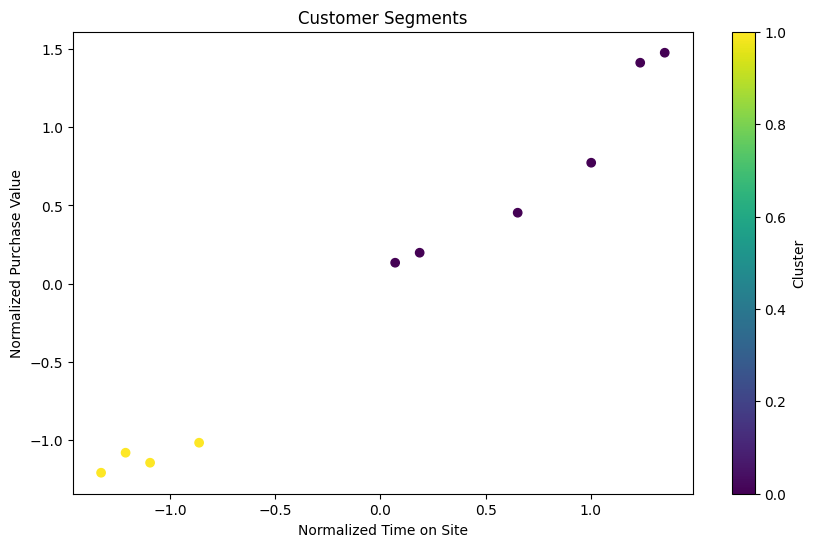

In [143]:
import numpy as np
import json
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination
import matplotlib.pyplot as plt
import os


class CustomerSegmentation:
    def __init__(self, n_clusters=2):
        self.n_clusters = n_clusters
        self.gmm = GaussianMixture(n_components=n_clusters, random_state=42)
        self.scaler = StandardScaler()
        self.bayesian_network = None

        # Embedded data
        self.data = {
            "customers": [
                {"id": 1, "X1": 10, "X2": 100, "Z1": 25, "Z2": 2000},
                {"id": 2, "X1": 12, "X2": 120, "Z1": 27, "Z2": 2500},
                {"id": 3, "X1": 20, "X2": 300, "Z1": 35, "Z2": 4000},
                {"id": 4, "X1": 21, "X2": 310, "Z1": 36, "Z2": 4200},
                {"id": 5, "X1": 30, "X2": 500, "Z1": 45, "Z2": 6000},
                {"id": 6, "X1": 31, "X2": 510, "Z1": 46, "Z2": 6200},
                {"id": 7, "X1": 8, "X2": 90, "Z1": 22, "Z2": 1800},
                {"id": 8, "X1": 9, "X2": 110, "Z1": 23, "Z2": 1900},
                {"id": 9, "X1": 25, "X2": 350, "Z1": 40, "Z2": 5000},
                {"id": 10, "X1": 28, "X2": 400, "Z1": 42, "Z2": 5500}
            ]
        }

    def prepare_data(self):
        """Prepare data for GMM analysis"""
        X = np.array([[c['X1'], c['X2']] for c in self.data['customers']])
        return self.scaler.fit_transform(X)

    def fit_gmm(self):
        """Fit GMM model and return cluster assignments"""
        X = self.prepare_data()
        self.clusters = self.gmm.fit_predict(X)
        return self.clusters

    def setup_bayesian_network(self):
        """Setup Bayesian Network structure"""
        self.bayesian_network = BayesianNetwork([
            ('Z1', 'Cluster'),
            ('Z2', 'Cluster')
        ])

        # Create CPDs
        z1_cpd = TabularCPD(
            variable='Z1',
            variable_card=2,
            values=[[0.6], [0.4]]
        )

        z2_cpd = TabularCPD(
            variable='Z2',
            variable_card=2,
            values=[[0.5], [0.5]]
        )

        cluster_cpd = TabularCPD(
            variable='Cluster',
            variable_card=2,
            values=[
                [0.8, 0.7, 0.3, 0.2],  # Cluster 1 probabilities
                [0.2, 0.3, 0.7, 0.8]  # Cluster 2 probabilities
            ],
            evidence=['Z1', 'Z2'],
            evidence_card=[2, 2]
        )

        self.bayesian_network.add_cpds(z1_cpd, z2_cpd, cluster_cpd)

    def compute_cluster_probability(self, z1_val, z2_val):
        """Compute P(Cluster2|Z1,Z2)"""
        z1_cat = 1 if z1_val >= 35 else 0
        z2_cat = 1 if z2_val >= 4000 else 0

        inference = VariableElimination(self.bayesian_network)
        evidence = {'Z1': z1_cat, 'Z2': z2_cat}
        result = inference.query(variables=['Cluster'], evidence=evidence)
        return result.values[1]

    def visualize_clusters(self):
        """Visualize the customer segments"""
        X = self.prepare_data()

        plt.figure(figsize=(10, 6))
        scatter = plt.scatter(X[:, 0], X[:, 1], c=self.clusters, cmap='viridis')
        plt.xlabel('Normalized Time on Site')
        plt.ylabel('Normalized Purchase Value')
        plt.title('Customer Segments')
        plt.colorbar(scatter, label='Cluster')
        plt.show()


def main():
    # To suppress the joblib warning, set the environment variable
    os.environ['LOKY_MAX_CPU_COUNT'] = '4'

    # Initialize segmentation
    segmentation = CustomerSegmentation()

    # Fit GMM and get clusters
    clusters = segmentation.fit_gmm()
    print("\nGMM Cluster Assignments:")
    for i, cluster in enumerate(clusters, 1):
        print(f"Customer {i}: Cluster {cluster + 1}")

    # Setup and use Bayesian Network
    segmentation.setup_bayesian_network()

    # Compute P(Cluster2|Z1=35,Z2=4000)
    prob = segmentation.compute_cluster_probability(35, 4000)
    print(f"\nP(Cluster2|Z1=35,Z2=4000) = {prob:.3f}")

    # Visualize the clusters
    segmentation.visualize_clusters()


if __name__ == "__main__":
    main()

Okay, I understand. I will proceed with analyzing Lab 12, including the `main.py` code you provided.

# Lab 12: EM/GMM

## Explanation/Summarization

This lab focuses on using **Expectation-Maximization (EM)** and **Gaussian Mixture Models (GMM)** in conjunction with Bayesian Networks to solve a real-world customer segmentation problem.

**Key Concepts:**

*   **EM Algorithm:** An iterative algorithm for finding maximum likelihood estimates of parameters in statistical models, especially useful when the model depends on unobserved latent variables.
*   **GMM:** A probabilistic model that assumes all data points are generated from a mixture of a finite number of Gaussian distributions with unknown parameters.
*   **Bayesian Networks:** Directed acyclic graphs that represent probabilistic relationships among a set of variables.

**Goal:**

Segment customers of an online store based on their purchasing habits (total purchase value) and time spent on the website. Additionally, understand how these segments depend on covariates such as customer age and monthly income.

## Exercise: Customer Segmentation for an Online Store

### Description

An online store wants to segment its customers based on their purchasing habits and time spent on the website to send personalized offers. The marketing manager also wants to understand how these segments depend on customer age and monthly income.

**Data:**

*   **X1:** Time spent on site (in minutes).
*   **X2:** Total purchase value.
*   **Z1:** Customer age (covariate).
*   **Z2:** Monthly income (covariate).

**Clusters:**

*   **Cluster 1:** Customers with low purchase values and low time on site.
*   **Cluster 2:** Loyal customers with high purchase values and high time on site.

**Demands:**

1. Design an appropriate structure (presumably a Bayesian Network structure).
2. Compute P(Cluster2|Z1=35, Z2=4000) using the values from the example (on paper).
3. Implement the problem using EM/GMM and a Bayesian Network structure. The required probability values are read from an input file (which will be embedded in the code).

### Code

In [144]:
import pandas as pd
import numpy as np
import os
from sklearn.mixture import GaussianMixture
from scipy.stats import norm
os.environ['LOKY_MAX_CPU_COUNT'] = '1'  # Disable core detection warning

# Hardcoded input data
data = pd.DataFrame({
    'Customer': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'X1': [10, 12, 20, 21, 30, 31, 8, 9, 25, 28],
    'X2': [100, 120, 300, 310, 500, 510, 90, 110, 350, 400],
    'Z1': [25, 27, 35, 36, 45, 46, 22, 23, 40, 42],
    'Z2': [2000, 2500, 4000, 4200, 6000, 6200, 1800, 1900, 5000, 5500]
})

# Prepare the features for GMM (X1 and X2)
X = data[['X1', 'X2']].values

# Fit a GMM with 2 components
gmm = GaussianMixture(n_components=2, covariance_type='full')
gmm.fit(X)

# Assign clusters to each customer
clusters = gmm.predict(X)
data['Cluster'] = clusters

# Determine which cluster corresponds to Cluster1 and Cluster2 based on X1 and X2
cluster_means = gmm.means_
if cluster_means[0][0] < cluster_means[1][0] and cluster_means[0][1] < cluster_means[1][1]:
    # Cluster0 is Cluster1, Cluster1 is Cluster2
    data['Cluster'] = data['Cluster'].map({0: 'Cluster1', 1: 'Cluster2'})
else:
    # Cluster0 is Cluster2, Cluster1 is Cluster1
    data['Cluster'] = data['Cluster'].map({0: 'Cluster2', 1: 'Cluster1'})

# For each cluster, fit the distribution of Z1 and Z2
# Assuming Z1 and Z2 are normally distributed within each cluster

# Cluster1
cluster1_data = data[data['Cluster'] == 'Cluster1']
mu_z1_cluster1 = cluster1_data['Z1'].mean()
sigma_z1_cluster1 = cluster1_data['Z1'].var()
mu_z2_cluster1 = cluster1_data['Z2'].mean()
sigma_z2_cluster1 = cluster1_data['Z2'].var()

# Cluster2
cluster2_data = data[data['Cluster'] == 'Cluster2']
mu_z1_cluster2 = cluster2_data['Z1'].mean()
sigma_z1_cluster2 = cluster2_data['Z1'].var()
mu_z2_cluster2 = cluster2_data['Z2'].mean()
sigma_z2_cluster2 = cluster2_data['Z2'].var()

# Compute P(Cluster2 | Z1=35, Z2=4000) using Bayes' theorem
# P(Cluster2 | Z1, Z2) = [P(Z1, Z2 | Cluster2) * P(Cluster2)] / P(Z1, Z2)

# P(Z1=35 | Cluster2) and P(Z2=4000 | Cluster2)
p_z1_given_cluster2 = norm.pdf(35, loc=mu_z1_cluster2, scale=np.sqrt(sigma_z1_cluster2))
p_z2_given_cluster2 = norm.pdf(4000, loc=mu_z2_cluster2, scale=np.sqrt(sigma_z2_cluster2))

# P(Z1=35 | Cluster1) and P(Z2=4000 | Cluster1)
p_z1_given_cluster1 = norm.pdf(35, loc=mu_z1_cluster1, scale=np.sqrt(sigma_z1_cluster1))
p_z2_given_cluster1 = norm.pdf(4000, loc=mu_z2_cluster1, scale=np.sqrt(sigma_z2_cluster1))

# Prior probabilities
p_cluster1 = len(cluster1_data) / len(data)
p_cluster2 = len(cluster2_data) / len(data)

# P(Z1, Z2)
p_z = (p_z1_given_cluster1 * p_z2_given_cluster1 * p_cluster1 +
        p_z1_given_cluster2 * p_z2_given_cluster2 * p_cluster2)

# P(Cluster2 | Z1, Z2)
p_cluster2_given_z = (p_z1_given_cluster2 * p_z2_given_cluster2 * p_cluster2) / p_z

print(f"P(Cluster2 | Z1=35, Z2=4000) = {p_cluster2_given_z:.4f}")

# Gaussian parameters for each cluster's X1 and X2
# Cluster1
cluster1_X1_mean = cluster1_data['X1'].mean()
cluster1_X1_var = cluster1_data['X1'].var()
cluster1_X2_mean = cluster1_data['X2'].mean()
cluster1_X2_var = cluster1_data['X2'].var()

# Cluster2
cluster2_X1_mean = cluster2_data['X1'].mean()
cluster2_X1_var = cluster2_data['X1'].var()
cluster2_X2_mean = cluster2_data['X2'].mean()
cluster2_X2_var = cluster2_data['X2'].var()

# Print the Gaussian parameters for each cluster
print("\nCluster1:")
print(f"X1 ~ N({cluster1_X1_mean:.2f}, {cluster1_X1_var:.2f})")
print(f"X2 ~ N({cluster1_X2_mean:.2f}, {cluster1_X2_var:.2f})")
print("\nCluster2:")
print(f"X1 ~ N({cluster2_X1_mean:.2f}, {cluster2_X1_var:.2f})")
print(f"X2 ~ N({cluster2_X2_mean:.2f}, {cluster2_X2_var:.2f})")

P(Cluster2 | Z1=35, Z2=4000) = 1.0000

Cluster1:
X1 ~ N(9.75, 2.92)
X2 ~ N(105.00, 166.67)

Cluster2:
X1 ~ N(25.83, 21.37)
X2 ~ N(395.00, 8510.00)
